## plotting pre-process data 

In [7]:
import pandas as pd
import MySQLdb
import numpy as np
import time
import datetime 
import random
import matplotlib.pyplot as plt
%matplotlib inline 

SELECT Timestamp,total_watt FROM thesis.measure_15devices_month0 WHERE Timestamp >= '2016-09-04 00:00:00'   AND Timestamp <= '2016-09-06 23:59:59'; 
SELECT Timestamp,total_watt FROM thesis.measure_15devices_month1 WHERE Timestamp >= '2016-10-02 00:00:00'   AND Timestamp <= '2016-10-04 23:59:59'; 
SELECT Timestamp,total_watt FROM thesis.measure_15devices_month2  WHERE Timestamp >= '2016-11-06 00:00:00'   AND Timestamp <= '2016-11-08 23:59:59'; 
SELECT Timestamp,total_watt FROM thesis.measure_15devices_month3  WHERE Timestamp >= '2016-12-04 00:00:00'   AND Timestamp <= '2016-12-06 23:59:59'; 
SELECT Timestamp,total_watt FROM thesis.measure_15devices_month4  WHERE Timestamp >= '2017-01-01 00:00:00'   AND Timestamp <= '2017-01-03 23:59:59'; 
SELECT Timestamp,total_watt FROM thesis.measure_15devices_month5  WHERE Timestamp >= '2017-02-05 00:00:00'   AND Timestamp <= '2017-02-07 23:59:59'; 
SELECT Timestamp,total_watt FROM thesis.measure_15devices_month6  WHERE Timestamp >= '2017-03-05 00:00

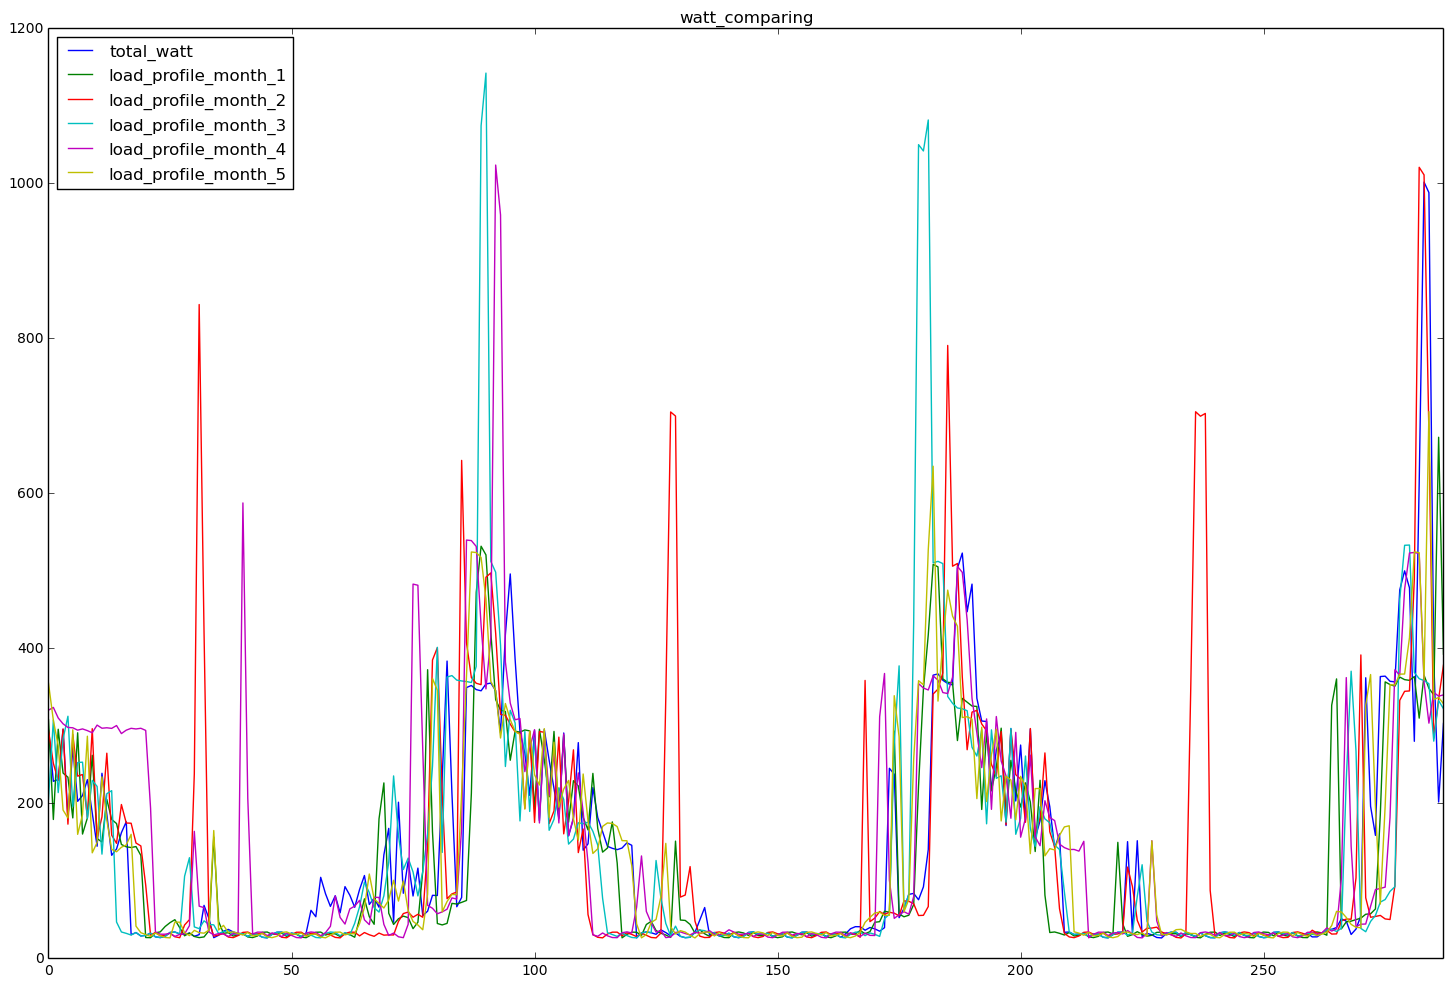

In [8]:
d = 3

time_a = pd.date_range('2016-09-04 00:00:00', periods=96*d, freq='15T')
time_b = pd.date_range('2016-09-04 00:14:59', periods=96*d, freq='15T')

time_a_1 = pd.date_range('2016-10-02 00:00:00', periods=96*d, freq='15T')
time_b_1 = pd.date_range('2016-10-02 00:14:59', periods=96*d, freq='15T')

time_a_2 = pd.date_range('2016-11-06 00:00:00', periods=96*d, freq='15T')
time_b_2 = pd.date_range('2016-11-06 00:14:59', periods=96*d, freq='15T')

time_a_3 = pd.date_range('2016-12-04 00:00:00', periods=96*d, freq='15T')
time_b_3 = pd.date_range('2016-12-04 00:14:59', periods=96*d, freq='15T')

time_a_4 = pd.date_range('2017-01-01 00:00:00', periods=96*d, freq='15T')
time_b_4 = pd.date_range('2017-01-01 00:14:59', periods=96*d, freq='15T')

time_a_5 = pd.date_range('2017-02-05 00:00:00', periods=96*d, freq='15T')
time_b_5 = pd.date_range('2017-02-05 00:14:59', periods=96*d, freq='15T')

time_a_6 = pd.date_range('2017-03-05 00:00:00', periods=96*d, freq='15T')
time_b_6 = pd.date_range('2017-03-05 00:14:59', periods=96*d, freq='15T')

conn = MySQLdb.connect("localhost","conn","hems")
c = conn.cursor()

# query = "SELECT watt FROM device.aircont WHERE Timestamp >= '%s'   AND Timestamp <= '%s'; "% (time_a[0],time_b[j-1])
query0 = "SELECT Timestamp,total_watt FROM thesis.measure_15devices_month0 WHERE Timestamp >= '%s'   AND Timestamp <= '%s'; "% (time_a[0],time_b[(96*d)-1])
df0 = pd.read_sql(query0, conn)
print query0

query1 = "SELECT Timestamp,total_watt FROM thesis.measure_15devices_month1 WHERE Timestamp >= '%s'   AND Timestamp <= '%s'; "% (time_a_1[0],time_b_1[(96*d)-1])
df1 = pd.read_sql(query1, conn )
print query1
df0['load_profile_month_1']=df1.total_watt

query2 = "SELECT Timestamp,total_watt FROM thesis.measure_15devices_month2  WHERE Timestamp >= '%s'   AND Timestamp <= '%s'; "% (time_a_2[0],time_b_2[(96*d)-1])
df2 = pd.read_sql(query2, conn)
print query2
df0['load_profile_month_2']= df2.total_watt

query3 = "SELECT Timestamp,total_watt FROM thesis.measure_15devices_month3  WHERE Timestamp >= '%s'   AND Timestamp <= '%s'; "% (time_a_3[0],time_b_3[(96*d)-1])
df3 = pd.read_sql(query3, conn)
print query3
df0['load_profile_month_3']= df3.total_watt

query4 = "SELECT Timestamp,total_watt FROM thesis.measure_15devices_month4  WHERE Timestamp >= '%s'   AND Timestamp <= '%s'; "% (time_a_4[0],time_b_4[(96*d)-1])
df4 = pd.read_sql(query4, conn)
print query4
df0['load_profile_month_4']= df4.total_watt

query5 = "SELECT Timestamp,total_watt FROM thesis.measure_15devices_month5  WHERE Timestamp >= '%s'   AND Timestamp <= '%s'; "% (time_a_5[0],time_b_5[(96*d)-1])
df5 = pd.read_sql(query5, conn)
print query5
df0['load_profile_month_5']= df5.total_watt


query6 = "SELECT Timestamp,total_watt FROM thesis.measure_15devices_month6  WHERE Timestamp >= '%s'   AND Timestamp <= '%s'; "% (time_a_6[0],time_b_6[(96*d)-1])
df6 = pd.read_sql(query6, conn)
print query6
df0['load_profile_month_5']= df6.total_watt

fig, ax = plt.subplots(figsize=(9*2, 4*3))
ax.set_title('watt_comparing')

df0.plot(ax=ax )
plt.show()


In [9]:
"""
unit >> bill
"""

import pandas as pd
import matplotlib.pyplot as plt
import MySQLdb
import time

from sympy import *
from sympy.solvers import solve
from sympy.parsing.sympy_parser import parse_expr

# x = raw_input('What about Ft?')
# Ft = float(x)
Ft = -0.048
t1 = 3.2484      # rate_1
t2 = 4.2218      # rate_2
t3 = 4.4217      # rate_3
ser = 38.22      # service_charge
u = symbols('u')

def bill(allpow):    
    ## Fundamental parameter
    if allpow == 0:
        bath = 0
    elif 1 <= allpow <= 150:
        bath = allpow*t1
    elif  151 <= allpow <= 400:
        power = allpow-150
        bath_1 = 150*t1
        bath_2 = power*t2
        bath = bath_1+bath_2
    else:
        power = allpow-150
        bath_1 = 150*t1
        power = power-250
        bath_2 = 250*t2
        bath_3 = power*t3
        bath = bath_1+bath_2+bath_3   
    service_price = 38.22  #permonth (fixed)   
    ## FT -33.2 satang/unit
    FT_price = allpow*Ft
    ## VAT 7%
    VAT_price = ((service_price+bath)+FT_price)*0.07
    bill = bath+service_price+FT_price+VAT_price
    return round(bill,2)

### MONTH0 : September

In [5]:
d = 30

time_a = pd.date_range('2016-09-01 00:00:00', periods=96*d, freq='15T')
time_b = pd.date_range('2016-09-01 00:14:59', periods=96*d, freq='15T')
conn = MySQLdb.connect("localhost","conn","hems")
c = conn.cursor()

query0 = "SELECT Timestamp,total_watt FROM thesis.measure_15devices_month0 WHERE Timestamp >= '%s'AND  Timestamp <= '%s'; "% (time_a[0],time_b[-1])
# query0 = "SELECT Timestamp,total_watt FROM thesis.measure_15devices WHERE Timestamp >= '2016-09-01 00:00:00' AND  Timestamp <= '2016-09-30 23:59:59'; "
df = pd.read_sql(query0, conn)
print time_a[0],"to",time_b[-1]
print "Total unit consumption in the last month equal to",df.total_watt.sum()/1000,"kW"
print "The elctrical bill is about",bill(df.total_watt.sum()/1000),"bath with Ft = -0.048"


2016-09-01 00:00:00 to 2016-09-30 23:59:59
Total unit consumption in the last month equal to 370.1870531 kW
The elctrical bill is about 1537.91 bath with Ft = -0.048


### MONTH1 : October

In [6]:
d = 31

time_a = pd.date_range('2016-10-01 00:00:00', periods=96*d, freq='15T')
time_b = pd.date_range('2016-10-01 00:14:59', periods=96*d, freq='15T')
conn = MySQLdb.connect("localhost","conn","hems")
c = conn.cursor()

query0 = "SELECT Timestamp,total_watt FROM thesis.measure_15devices_month1 WHERE Timestamp >= '%s'AND  Timestamp <= '%s'; "% (time_a[0],time_b[-1])
# query0 = "SELECT Timestamp,total_watt FROM thesis.measure_15devices_plattern WHERE Timestamp >= '2016-10-01 00:00:00' AND  Timestamp <= '2016-10-31 23:44:59'; "
df = pd.read_sql(query0, conn)
print time_a[0],"to",time_b[-1]
print "Total unit consumption in the next month equal to",df.total_watt.sum()/1000,"kW"
print "The elctrical bill is about",bill(df.total_watt.sum()/1000),"bath with Ft = -0.048"


2016-10-01 00:00:00 to 2016-10-31 23:59:59
Total unit consumption in the next month equal to 383.111085 kW
The elctrical bill is about

NameError: name 'bill' is not defined

### MONTH2 : November

In [10]:
d = 30

time_a = pd.date_range('2016-11-01 00:00:00', periods=96*d, freq='15T')
time_b = pd.date_range('2016-11-01 00:14:59', periods=96*d, freq='15T')
conn = MySQLdb.connect("localhost","conn","hems")
c = conn.cursor()

query0 = "SELECT Timestamp,total_watt FROM thesis.measure_15devices_month2 WHERE Timestamp >= '%s'AND  Timestamp <= '%s'; "% (time_a[0],time_b[-1])
# query0 = "SELECT Timestamp,total_watt FROM thesis.measure_15devices WHERE Timestamp >= '2016-09-01 00:00:00' AND  Timestamp <= '2016-09-30 23:59:59'; "
df = pd.read_sql(query0, conn)
print time_a[0],"to",time_b[-1]
print "Total unit consumption in the last month equal to",df.total_watt.sum()/1000,"kW"
print "The elctrical bill is about",bill(df.total_watt.sum()/1000),"bath with Ft = -0.048"


2016-11-01 00:00:00 to 2016-11-30 23:59:59
Total unit consumption in the last month equal to 386.3802557 kW
The elctrical bill is about 1610.23 bath with Ft = -0.048


### MONTH3 : DECEMBER

In [1]:
d = 31

time_a = pd.date_range('2016-12-01 00:00:00', periods=96*d, freq='15T')
time_b = pd.date_range('2016-12-01 00:14:59', periods=96*d, freq='15T')
conn = MySQLdb.connect("localhost","conn","hems")
c = conn.cursor()

query0 = "SELECT Timestamp,total_watt FROM thesis.measure_15devices_month3 WHERE Timestamp >= '%s'AND  Timestamp <= '%s'; "% (time_a[0],time_b[-1])
# query0 = "SELECT Timestamp,total_watt FROM thesis.measure_15devices WHERE Timestamp >= '2016-09-01 00:00:00' AND  Timestamp <= '2016-09-30 23:59:59'; "
df = pd.read_sql(query0, conn)
print time_a[0],"to",time_b[-1]
print "Total unit consumption in the last month equal to",df.total_watt.sum()/1000,"kW"
print "The elctrical bill is about",bill(df.total_watt.sum()/1000),"bath with Ft = -0.048"

NameError: name 'pd' is not defined

### MONTH4 : JANUARY

In [11]:
d = 31

time_a = pd.date_range('2017-01-01 00:00:00', periods=96*d, freq='15T')
time_b = pd.date_range('2017-01-01 00:14:59', periods=96*d, freq='15T')
conn = MySQLdb.connect("localhost","conn","hems")
c = conn.cursor()

query0 = "SELECT Timestamp,total_watt FROM thesis.measure_15devices_month4 WHERE Timestamp >= '%s'AND  Timestamp <= '%s'; "% (time_a[0],time_b[-1])
# query0 = "SELECT Timestamp,total_watt FROM thesis.measure_15devices WHERE Timestamp >= '2016-09-01 00:00:00' AND  Timestamp <= '2016-09-30 23:59:59'; "
df = pd.read_sql(query0, conn)
print time_a[0],"to",time_b[-1]
print "Total unit consumption in the last month equal to",df.total_watt.sum()/1000,"kW"
print "The elctrical bill is about",bill(df.total_watt.sum()/1000),"bath with Ft = -0.048"

2017-01-01 00:00:00 to 2017-01-31 23:59:59
Total unit consumption in the last month equal to 399.8333564 kW
The elctrical bill is about 1670.31 bath with Ft = -0.048


### MONTH5 : FEBRUARY

In [16]:
d = 28

time_a = pd.date_range('2017-02-01 00:00:00', periods=96*d, freq='15T')
time_b = pd.date_range('2017-02-01 00:14:59', periods=96*d, freq='15T')
conn = MySQLdb.connect("localhost","conn","hems")
c = conn.cursor()

query0 = "SELECT Timestamp,total_watt FROM thesis.measure_15devices_month5 WHERE Timestamp >= '%s'AND  Timestamp <= '%s'; "% (time_a[0],time_b[-1])
# query0 = "SELECT Timestamp,total_watt FROM thesis.measure_15devices WHERE Timestamp >= '2016-09-01 00:00:00' AND  Timestamp <= '2016-09-30 23:59:59'; "
df = pd.read_sql(query0, conn)
print time_a[0],"to",time_b[-1]
print "Total unit consumption in the last month equal to",df.total_watt.sum()/1000,"kW"
print "The elctrical bill is about",bill(df.total_watt.sum()/1000),"bath with Ft = -0.048"

2017-02-01 00:00:00 to 2017-02-28 23:59:59
Total unit consumption in the last month equal to 342.6839014 kW
The elctrical bill is about 1415.08 bath with Ft = -0.048


### MONTH6 : MARCH

In [17]:
d = 31

time_a = pd.date_range('2017-03-01 00:00:00', periods=96*d, freq='15T')
time_b = pd.date_range('2017-03-01 00:14:59', periods=96*d, freq='15T')
conn = MySQLdb.connect("localhost","conn","hems")
c = conn.cursor()

query0 = "SELECT Timestamp,total_watt FROM thesis.measure_15devices_month6 WHERE Timestamp >= '%s'AND  Timestamp <= '%s'; "% (time_a[0],time_b[-1])
# query0 = "SELECT Timestamp,total_watt FROM thesis.measure_15devices WHERE Timestamp >= '2016-09-01 00:00:00' AND  Timestamp <= '2016-09-30 23:59:59'; "
df = pd.read_sql(query0, conn)
print time_a[0],"to",time_b[-1]
print "Total unit consumption in the last month equal to",df.total_watt.sum()/1000,"kW"
print "The elctrical bill is about",bill(df.total_watt.sum()/1000),"bath with Ft = -0.048"

2017-03-01 00:00:00 to 2017-03-31 23:59:59
Total unit consumption in the last month equal to 390.4722818 kW
The elctrical bill is about 1628.5 bath with Ft = -0.048
